In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



person_1_mild = pd.read_excel('RawData/P_8_S_0.xlsx')
#person_1_medium = pd.read_excel('RawData/P_12_S_1.xlsx')
#person_1_high = pd.read_excel('RawData/P_8_S_2.xlsx')






No handles with labels found to put in legend.


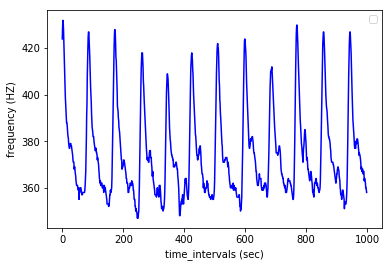

In [48]:
#f,ax = plt.subplots(3)

#plt.plot(person_1_mild[0:1000],color = 'g')
#plt.plot(person_1_medium[7000:8000],label = 'medium_stress',color = 'm')
fig = plt.figure()
plt.plot(person_1_mild[0:1000],color = 'b')
plt.xlabel('time_intervals (sec)')
plt.ylabel('frequency (HZ)')
plt.legend(fontsize = 'medium')
fig.savefig('thesis_plot/rawdataset.png',format='png')
plt.show()



In [24]:
hrw = 0.75
fs = 100
mov_avg = person_1_high['hart'].rolling(int(hrw*fs)).mean() #Calculate moving average
#Impute where moving average function returns NaN, which is the beginning of the signal where x hrw
avg_hr = (np.mean(person_1_high.hart))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
mov_avg = [x*1.2 for x in mov_avg] #For now we raise the average by 20% to prevent the secondary heart contraction from interfering, in part 2 we will do this dynamically
person_1_high['hart_rollingmean'] = mov_avg #Append the moving average to the dataframe
#Mark regions of interest
window = []
peaklist = []
listpos = 0 #We use a counter to move over the different data columns
for datapoint in dataset.hart:
    rollingmean = person_1_high.hart_rollingmean[listpos] #Get local mean
    if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
        listpos += 1
    elif (datapoint > rollingmean): #If signal comes above local mean, mark ROI
        window.append(datapoint)
        listpos += 1
    else: #If signal drops below local mean -> determine highest point
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
        peaklist.append(beatposition) #Add detected peak to list
        window = [] #Clear marked ROI
        listpos += 1
ybeat = [person_1_high.hart[x] for x in peaklist] #Get the y-value of all peaks for plotting purposes
plt.title("Detected peaks in signal")
plt.xlim(0,2500)
plt.plot(dataset.hart, alpha=0.5, color='blue') #Plot semi-transparent HR
plt.plot(mov_avg, color ='green') #Plot moving average
plt.scatter(peaklist, ybeat, color='red') #Plot detected peaks
plt.show()

KeyError: 'hart'

In [3]:
print(person_1_mild.shape)
print(person_1_medium.shape)
print(person_1_high.shape)

(23575, 1)
(21439, 1)
(22395, 1)


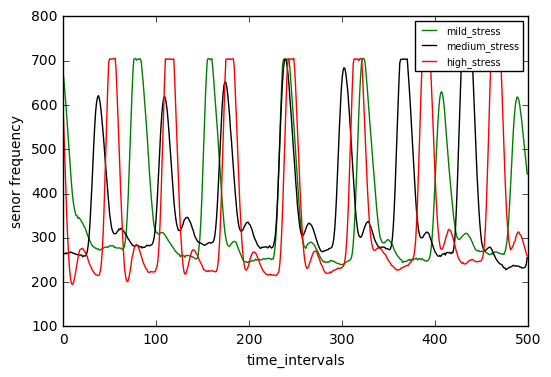

In [5]:
from matplotlib import colors as mcolors
plt.plot(person_1_mild[0:500],label = 'mild_stress',color = 'g')
plt.plot(person_1_medium[0:500],label = 'medium_stress',color = 'k')
plt.plot(person_1_high[0:500],label = 'high_stress',color = 'r')
plt.xlabel('time_intervals')
plt.ylabel('senor frequency')
plt.legend(fontsize = 'x-small')
plt.show()



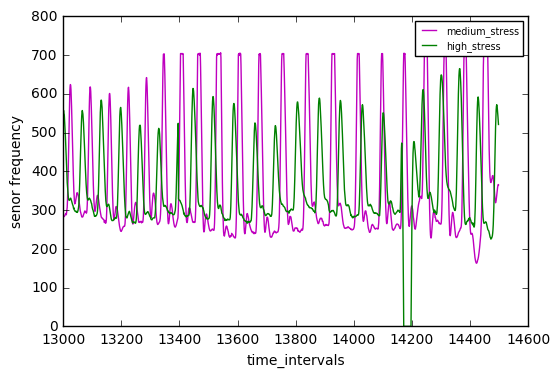

In [6]:
#plt.plot(person_05_mild[0:1000],label = 'mild_stress',color = 'r')
plt.plot(person_1_medium[13000:14499],label = 'medium_stress',color = 'm')
plt.plot(person_1_high[13000:14499],label = 'high_stress',color = 'g')
plt.legend(fontsize = 'x-small')
plt.xlabel('time_intervals')
plt.ylabel('senor frequency')
plt.show()



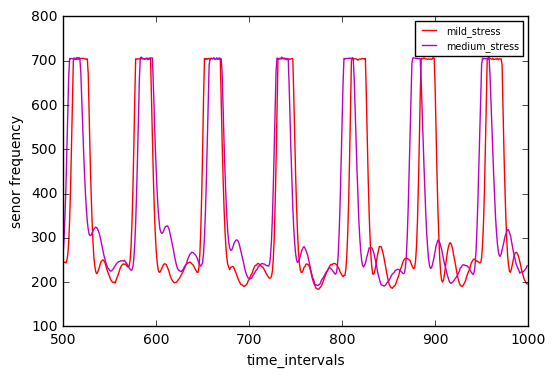

In [117]:
plt.plot(person_05_mild[500:1000],label = 'mild_stress',color = 'r')
plt.plot(person_05_medium[500:1000],label = 'medium_stress',color = 'm')
plt.legend(fontsize = 'x-small')
plt.xlabel('time_intervals')
plt.ylabel('senor frequency')
plt.show()

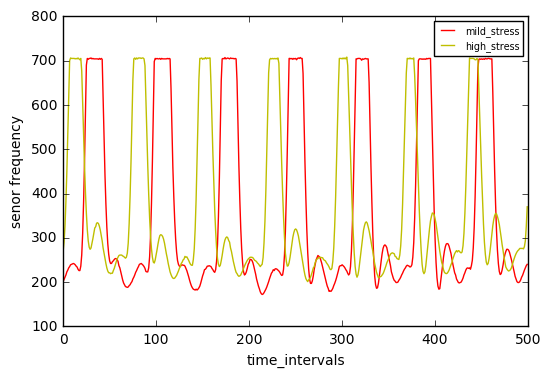

In [115]:
plt.plot(person_05_mild[0:500],label = 'mild_stress',color = 'r')
plt.plot(person_05_high[0:500],label = 'high_stress',color = 'y')
plt.legend(fontsize = 'x-small')
plt.xlabel('time_intervals')
plt.ylabel('senor frequency')
plt.show()

In [ ]:
#### data set of person 5

f,ax = plt.subplots(3)
ax[0].plot(person_05_mild[0:500],label = 'mild_stress',color = 'r')
ax[1].plot(person_05_medium[0:500],label = 'medium_stress',color = 'm')
ax[2].plot(person_05_high[0:500],label = 'high_stress',color = 'y')
plt.legend(fontsize = 'x-small')
plt.xlabel('time_intervals')
plt.ylabel('senor frequency')
plt.show()
